In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline
import numpy.random as rnd
import statsmodels.api as sm
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.tools as tls
import plotly.figure_factory as ff
#import lightgbm as lgbm
import plotly.tools as tls
from collections import Counter
from sklearn.neighbors import LocalOutlierFactor
from warnings import filterwarnings

In [2]:
df = pd.read_excel('C:\\Users\\lenovo\\Desktop\\8th semster\\patent project\\Patent.xlsx')
df.head()

,Title,Inventors,Applicants,country,Publication number,IPC,CPC,Publication date
0,STRETCHABLE AND WEARABLE WIRELESS 3-LEADS ECG ...,YU XINGE [HK] \nLIU YIMING [HK] \nZHOU JINGKUN...,UNIV CITY HONG KONG [HK],United States of America,US2023021804A1,A61B5/00 -Measuring for diagnostic purposes \n...,A61B5/00 -Measuring for diagnostic purposes 06...,2023-01-26
1,PERCUTANEOUS LARGE HOLE PROCEDURE,COHLMIA JR GEORGE S [US],COHLMIA JR GEORGE S [US],United States of America,US2023027775A1,"A61B17/00 -Surgical instruments,devices or met...","A61B17/00 -Surgical instruments,devices or met...",2023-01-26 00:00:00
2,SYSTEM for MULTIMODAL APPROACH TO COMPUTER ASS...,SHELTON RYAN [US] \nNOLAN RYAN [US] \nMOHAN NI...,PHOTONICARE INC [US],WIPO,WO2023004183A1,A61B1/05 -Instruments for performing medical e...,A61B1/00 -Instruments for performing medical e...,2023-01-26
3,A METHOD AND SYSTEM for ISCHEMIC PRE-CONDITION...,BHUSHAN MANAV [IN] \nSIBAL SANDEEP [IN],FOURTH FRONTIER TECH PVT LTD [IN],WIPO,WO2023002248A1,A61B5/00 -Measuring for diagnostic purposes \n...,A61B5/00 -Measuring for diagnostic purposes 02...,2023-01-26
4,TRIPHALANGEAL ULTRASOUND PROBE STABILIZATION F...,PETERSON BART [US] \nSOWARDS STEFFAN [US] \nWI...,BARD ACCESS SYSTEMS INC [US],WIPO,WO2023004133A1,A61B8/00 -Diagnosis using ultrasonicsonic or i...,"A61B8/44 (EP,US) \nA61B8/4455 (EP) \nB65D63/10...",2023-01-26


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9720 entries, 0 to 9719
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               9720 non-null   object
 1   Inventors           9428 non-null   object
 2   Applicants          9520 non-null   object
 3   country             9712 non-null   object
 4   Publication number  9720 non-null   object
 5   IPC                 9676 non-null   object
 6   CPC                 9720 non-null   object
 7   Publication date    9720 non-null   object
dtypes: object(8)
memory usage: 607.6+ KB


In [4]:
df = df.dropna()
df = df.drop_duplicates()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8808 entries, 0 to 9719
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Title               8808 non-null   object
 1   Inventors           8808 non-null   object
 2   Applicants          8808 non-null   object
 3   country             8808 non-null   object
 4   Publication number  8808 non-null   object
 5   IPC                 8808 non-null   object
 6   CPC                 8808 non-null   object
 7   Publication date    8808 non-null   object
dtypes: object(8)
memory usage: 619.3+ KB


In [6]:
df.describe().T

,count,unique,top,freq
Title,8808,8455,Instrument transmission seat for minimally inv...,7
Inventors,8808,8081,LI YAO \nLING ZHENGGANG \nHUANG SONG \nLUO TEN...,15
Applicants,8808,5239,COVIDIEN LP [US],108
country,8808,35,China,3191
Publication number,8808,8773,US10219862B2 \nUS2018071021A1,4
IPC,8808,6039,A61B5/00 -Measuring for diagnostic purposes,119
CPC,8808,8309,A61B17/12 -Surgical instruments; for ligaturin...,31
Publication date,8808,1132,2023-01-05,419


In [7]:
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import plotly.express as px

# Combine all the text data
text_data = df['Title'].str.cat(df['Inventors'], sep=' ').str.cat(df['IPC'], sep=' ')

# Extract only text (exclude numbers)
text_data = text_data.str.findall(r'\b[a-zA-Z]+\b').str.join(' ')

# Create a CountVectorizer to count word frequencies
vectorizer = CountVectorizer(stop_words='english', max_features=30)
word_count_matrix = vectorizer.fit_transform(text_data)

# Calculate word frequencies
word_freq = np.array(np.sum(word_count_matrix, axis=0)).reshape(-1)
words = np.array(vectorizer.get_feature_names_out())
word_freq_df = pd.DataFrame({'words': words, 'frequency': word_freq})

# Sort the dataframe by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='frequency', ascending=False)

# Create an interactive bar chart of word frequencies
fig = px.bar(word_freq_df, x='words', y='frequency', title='Word Frequencies', labels={'words': 'Words', 'frequency': 'Frequency'})
fig.show()

## Quantitative-analysis
### Ranking-Map: Number of patents by country

- This visualization shows that China has the biggest number of patents, which indicates that China has more medical research and applications than all of the other countries. 
- WIPO is the second highest country. And the United States is the third highest country.
- Countries such as Japan, Luxemburg, and Portugal have less than 5 patents only over + 3 years.

In [8]:
# Count the number of patents per country
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Number of Patents']

# Create a bar chart using Plotly Express
fig = px.bar(country_counts, x='Country', y='Number of Patents', title='Number of Patents by Country')

# Show the plot
fig.show()
#fig.write_html(file='Quantitative-Ranking-Map.html', auto_open=True)

## Quantitative-analysis
### Ranking-Map: Number of Patents by IPC Main Class and Country ( selected )

- A61B1 =(DIAGNOSIS; SURGERY; IDENTIFICATION) 
- A61B3 =(Apparatus for testing the eyes; Instruments for examining the eyes)
- A61B6 =(Apparatus for radiation diagnosis)
- A61B8 =(Diagnosis using ultrasonic, sonic or infrasonic waves)
- A61B5 =(Measuring for diagnostic purposes )

In [9]:
# Extract the main IPC class
df['ipc_main_class'] = df['IPC'].apply(lambda x: x[:5])

# Filter the data for the specified IPC main classes
selected_ipc_classes = ['A61B1', 'A61B3', 'A61B6', 'A61B8', 'A61B5']
data_filtered = df[df['ipc_main_class'].isin(selected_ipc_classes)]

# Group the data by IPC main class and country, and count the number of occurrences
ipc_country_counts = data_filtered.groupby(['ipc_main_class', 'country']).size().reset_index()
ipc_country_counts.columns = ['ipc_main_class', 'country', 'count']

# Create a grouped bar chart visualization
fig = px.bar(ipc_country_counts,
             x='country',
             y='count',
             color='ipc_main_class',
             barmode='group',
             title='Number of Patents by IPC Main Class and Country ( selected  )',
             labels={'ipc_main_class': 'IPC Main Class', 'country': 'Country', 'count': 'Number of Patents'},
             category_orders={'ipc_main_class': selected_ipc_classes})

fig.show()
#fig.write_html(file='bar-chart-selected.html', auto_open=True)

## Quantitative-analysis
### Portion Rate Map : Distribution of the top inventors and top applicants: 

-This visualization shows that Li Yao is the top inventor with the biggest inventions number over the timeline of this dataset as he contributed 16.5% of the total medical inventions or research done over the countries.
- it also clearly shows that top companies investing in the field are: 
  - Covidien LP (Based in the US) with 17% of the total applications.
  - Konkinklijke Philips NV (Based in the Netherlands) with 14.5% of the total applications.
  - Cilah Gmbh Int (based in China) with a total of 12% of the applications

#### We can conclude that even though the data shows that China is the highest country contributing to patents, however, Chinese companies are not the biggest companies in the field, as an investment in the US and Netherlands companies is also so beneficial. 

In [10]:
def extract_unique_names(column):
    all_names = []
    for names in column:
        for name in names.split('\n'):
            all_names.append(name.strip())
    return pd.Series(all_names).value_counts().reset_index()
inventors_counts = extract_unique_names(df['Inventors'])
applicants_counts = extract_unique_names(df['Applicants'])
N = 10
top_inventors = inventors_counts.head(N)
top_applicants = applicants_counts.head(N)
fig = make_subplots(rows=1, cols=2, specs=[[{'type': 'pie'}, {'type': 'pie'}]], subplot_titles=["Top Inventors", "Top Applicants"])

fig.add_trace(go.Pie(labels=top_inventors['index'], values=top_inventors[0], name='Inventors'), row=1, col=1)
fig.add_trace(go.Pie(labels=top_applicants['index'], values=top_applicants[0], name='Applicants'), row=1, col=2)

fig.update_layout(title_text="Top Inventors and Applicants")
fig.show()
#fig.write_html(file='Portion-rate-Map.html', auto_open=True)

## Quantitative-analysis
### Portion Rate Map :Top 10 Countries for Patent Applications Related to IPC_A61B

In [11]:
# Filter the data by the "IPC_A61B" category
ipc_a61b_df = df[df['IPC'].str.startswith('A61B')]

# Group by country and count the number of patent applications
country_counts = ipc_a61b_df.groupby('country').size().reset_index(name='count')
top_10_countries = country_counts.sort_values(by='count', ascending=False).head(10)

# Check if any of the countries in the top 10 have zero patent applications
if top_10_countries['count'].sum() == 0:
    print('There are no patent applications related to IPC_A61B for any of the top 10 countries.')
else:
    # Create an interactive pie chart
    fig = px.pie(top_10_countries,
                 values='count',
                 names='country',
                 title='Top 10 Countries for Patent Applications Related to IPC_A61B')
    fig.show()
    fig.write_html(file='bar-chartIPC_A61B.html', auto_open=True)

## Quantitative-analysis
### Share Map : Number of patents by IPC category and country:

-  the visualization shows all İPC categories over all of the countries included in the dataset.
- The longest stacked bar in the visualization shows that the A61B4 IPC category ( Measuring for diagnostic purposes) is the most repeated IPC category over the different countries. thus we can conclude that investing in this specific category is a good investment all over the world.

In [12]:
df['IPC_main'] = df['IPC'].apply(lambda x: x.split('-')[0].strip())
grouped_data = df.groupby(['IPC_main', 'country']).size().reset_index(name='count')
total_counts = grouped_data.groupby('IPC_main')['count'].transform('sum')
grouped_data['percentage'] = grouped_data['count'] / total_counts * 100
fig = px.bar(grouped_data, x='IPC_main', y='count', color='country', text='percentage', title='Number of Patents by IPC Category and Country')
fig.update_layout(xaxis_title='IPC Category', yaxis_title='Number of Patents')
fig.update_traces(texttemplate='%{text:.2f}%', textposition='inside')
fig.show()

#fig.write_html(file='Share-Map.html', auto_open=True)

# Quantitative-analysis
## Time Series Visualizations:
### 1- Publication Count by Month


In [13]:
import re

# Define a function to extract valid date strings
def extract_date(date_str):
    if not isinstance(date_str, str):
        return None
    date_pattern = re.compile(r'\d{4}-\d{2}-\d{2}')
    match = date_pattern.search(date_str)
    if match:
        return match.group(0).strip()
    else:
        return None

# Apply the extract_date function to the 'Publication date' column
df['Publication date'] = df['Publication date'].apply(extract_date)

# Filter out rows with invalid or missing dates
df = df[df['Publication date'].notna()]

# Convert the 'Publication date' column to a datetime object
df['Publication date'] = pd.to_datetime(df['Publication date'])

# Group the data by month 
data_grouped = df.resample('M', on='Publication date').size().reset_index(name='count')



In [14]:
fig = px.line(data_grouped, x='Publication date', y='count', title='Publication Count by Month')
fig.show()
#fig.write_html(file='Time Series.html', auto_open=True)

### 2- Bar chart for the publication count by month:

In [15]:
fig = px.bar(data_grouped, x='Publication date', y='count', title='Publication Count by Month')
fig.show()
#fig.write_html(file='Time Series2.html', auto_open=True)

### 3- Rolling mean of the publication count by month:

In [16]:
data_grouped['rolling_mean'] = data_grouped['count'].rolling(window=3).mean()

fig = go.Figure()
fig.add_trace(go.Scatter(x=data_grouped['Publication date'], y=data_grouped['count'], mode='lines', name='Publication Count'))
fig.add_trace(go.Scatter(x=data_grouped['Publication date'], y=data_grouped['rolling_mean'], mode='lines', name='Rolling Mean'))

fig.update_layout(title='Publication Count by Month with Rolling Mean', xaxis_title='Publication Date', yaxis_title='Count')
fig.show()
#fig.write_html(file='Rolling mean.html', auto_open=True)

### 4- Publication count by quarter:

In [17]:
data_grouped_quarter = df.resample('Q', on='Publication date').size().reset_index(name='count')

fig = px.line(data_grouped_quarter, x='Publication date', y='count', title='Publication Count by Quarter')
fig.show()
#fig.write_html(file='Time Series3.html', auto_open=True)

### 5- time and country overall publication:

In [18]:
# Group the data by country and month
data_grouped_country = df.groupby('country').resample('M', on='Publication date').size().reset_index(name='count')

# Plot the data
fig = px.line(data_grouped_country, x='Publication date', y='count', color='country', title='Publication Count by Country and Month')
fig.show()
#fig.write_html(file='Time Series4.html', auto_open=True)

### 6- IPC Sections over time:

In [19]:
# Extract the first 4 characters of the IPC codes to obtain the IPC section
df['IPC_section'] = df['IPC'].str[:4]

# Group the data by IPC section and month
data_grouped_ipc = df.groupby('IPC_section').resample('M', on='Publication date').size().reset_index(name='count')

# Plot the data
fig = px.line(data_grouped_ipc, x='Publication date', y='count', color='IPC_section', title='Publication Count by IPC Section and Month')
fig.show()
#fig.write_html(file='Time Series5.html', auto_open=True)

# Qualitative analysis

## IPC related visualizations: 

### 1- Bar Number Of Patents By IPC Main Class

In [20]:
# Extract the main IPC class
df['ipc_main_class'] = df['IPC'].apply(lambda x: x[:4])

# Group the data by IPC main class and count the number of occurrences
ipc_counts = df['ipc_main_class'].value_counts().reset_index()
ipc_counts.columns = ['ipc_main_class', 'count']

# Create a bar chart visualization
fig = px.bar(ipc_counts,
             x='ipc_main_class',
             y='count',
             title='Number of Patents by IPC Main Class',
             labels={'ipc_main_class': 'IPC Main Class', 'count': 'Number of Patents'},
             color='count',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.show()
#fig.write_html(file='bar-chart.html', auto_open=True)

# Qualitative analysis

## IPC related visualizations: 

### 2-Scatter Chart Of The Number Of Patents By IPC Main Class

In [21]:
# Extract the main IPC class
df['ipc_main_class'] = df['IPC'].apply(lambda x: x[:4])

# Group the data by IPC main class and count the number of occurrences
ipc_counts = df['ipc_main_class'].value_counts().reset_index()
ipc_counts.columns = ['ipc_main_class', 'count']

# Create a scatter chart visualization
fig = px.scatter(ipc_counts,
             x='ipc_main_class',
             y='count',
             title='Number of Patents by IPC Main Class',
             labels={'ipc_main_class': 'IPC Main Class', 'count': 'Number of Patents'},
             color='count',
             color_continuous_scale=px.colors.sequential.Viridis)

fig.show()
#fig.write_html(file='scatter-with.html', auto_open=True)

### If A61B was treated as an outlier and excluded  from the graph, more patents can be clearly shown as follows:

- A61M = 87 ( DEVICES FOR INTRODUCING MEDIA INTO, OR ONTO, THE BODY ) 
- A61F = 80 ( FILTERS IMPLANTABLE INTO BLOOD VESSELS; PROSTHESES; DEVICES PROVIDING PATENCY TO, OR PREVENTING COLLAPSING OF, TUBULAR STRUCTURES OF THE BODY)
- A61N = 69 ( ELECTROTHERAPY; MAGNETOTHERAPY; RADIATION THERAPY; ULTRASOUND THERAPY)
- G16H = 45 (HEALTHCARE INFORMATICS)
- A01k = 40 ( ANIMAL HUSBANDRY)

# Qualitative analysis

## IPC related visualizations: 

### 3-	Scatter Chart Of The Number Of Patents By IPC Main Class (Excluding A61B)

In [22]:
# Extract the main IPC class
df['ipc_main_class'] = df['IPC'].apply(lambda x: x[:4])

# Group the data by IPC main class and count the number of occurrences
ipc_counts = df['ipc_main_class'].value_counts().reset_index()
ipc_counts.columns = ['ipc_main_class', 'count']

# Exclude the value A61B from the ipc_main_class
ipc_counts_filtered = ipc_counts[ipc_counts['ipc_main_class'] != 'A61B']

# Create a scatter plot visualization
fig = px.scatter(ipc_counts_filtered,
                 x='ipc_main_class',
                 y='count',
                 title='Number of Patents by IPC Main Class (excluding A61B)',
                 labels={'ipc_main_class': 'IPC Main Class', 'count': 'Number of Patents'},
                 color='count',
                 color_continuous_scale=px.colors.sequential.Viridis)

fig.show()
#fig.write_html(file='scatter-without-A61B.html', auto_open=True)


# Qualitative analysis

## IPC related visualizations: 

### 4- Bar Chart Of The Number Of Patents By IPC Main Class And Country

In [23]:
# Extract the main IPC class
df['ipc_main_class'] = df['IPC'].apply(lambda x: x[:4])

# Filter the data for the specified IPC main classes
selected_ipc_classes = ['A61B', 'A61M', 'A61F', 'A61N', 'G16H', 'A01K']
data_filtered = df[df['ipc_main_class'].isin(selected_ipc_classes)]

# Group the data by IPC main class and country, and count the number of occurrences
ipc_country_counts = data_filtered.groupby(['ipc_main_class', 'country']).size().reset_index()
ipc_country_counts.columns = ['ipc_main_class', 'country', 'count']

# Create a grouped bar chart visualization
fig = px.bar(ipc_country_counts,
             x='country',
             y='count',
             color='ipc_main_class',
             barmode='group',
             title='Number of Patents by IPC Main Class and Country',
             labels={'ipc_main_class': 'IPC Main Class', 'country': 'Country', 'count': 'Number of Patents'},
             category_orders={'ipc_main_class': selected_ipc_classes})

fig.show()
#fig.write_html(file='bar-chart2.html', auto_open=True)

# Qualitative analysis

## IPC related visualizations: 

### 5-Bar Chart Of The Number Of Patents By IPC Main Class And Country (Excluding A61B )

In [24]:
# Extract the main IPC class
df['ipc_main_class'] = df['IPC'].apply(lambda x: x[:4])

# Filter the data for the specified IPC main classes
selected_ipc_classes = ['A61M', 'A61F', 'A61N', 'G16H', 'A01K']
data_filtered = df[df['ipc_main_class'].isin(selected_ipc_classes)]

# Group the data by IPC main class and country, and count the number of occurrences
ipc_country_counts = data_filtered.groupby(['ipc_main_class', 'country']).size().reset_index()
ipc_country_counts.columns = ['ipc_main_class', 'country', 'count']

# Create a grouped bar chart visualization
fig = px.bar(ipc_country_counts,
             x='country',
             y='count',
             color='ipc_main_class',
             barmode='group',
             title='Number of Patents by IPC Main Class and Country ( Execluding A61B )',
             labels={'ipc_main_class': 'IPC Main Class', 'country': 'Country', 'count': 'Number of Patents'},
             category_orders={'ipc_main_class': selected_ipc_classes})

fig.show()
#fig.write_html(file='bar-chart3-without-A61B.html', auto_open=True)

# Qualitative analysis

### Country wise Visualizations ( HeatMaps )

In [25]:
df.country.value_counts()

China                           3017
WIPO                            1925
United States of America        1666
Korea (South)                    798
European Patent Office           538
Germany                          147
Australia                        106
Russian Federation                71
France                            66
United Kingdom                    64
Brazil                            39
Canada                            37
Spain                             29
Israel                            16
Italy                             12
Netherlands                       11
Sweden                            10
Luxembourg                         9
Japan                              9
Chinese Taipei                     9
Finland                            8
Switzerland                        8
Czech Republic                     8
Hungary                            5
Portugal                           3
Eurasian Patent Organization       2
Argentina                          2
D

In [26]:
unique_countries = df['country'].unique()
print(unique_countries)

['United States of America' 'WIPO' 'Germany' 'Korea (South)' 'Spain'
 'European Patent Office' 'United Kingdom' 'Brazil' 'Canada' 'France'
 'Netherlands' 'Sweden' 'Czech Republic' 'Finland' 'Switzerland'
 'Australia' 'Luxembourg' 'Portugal' 'Israel' 'Argentina' 'Colombia'
 'Norway' 'Austria' 'Belgium' 'Hungary' 'China' 'Russian Federation'
 'Italy' 'Uruguay' 'Eurasian Patent Organization' 'Japan' 'Chinese Taipei'
 'Denmark' 'Singapore' 'Lithuania']


# Qualitative analysis

## Heat Map 

### 1-Number of Patents by Country

In [27]:
# Group the data by country and count the number of occurrences
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Create the map visualization
fig = px.choropleth(country_counts,
                    locations='country',
                    color='count',
                    locationmode='country names',
                    title='Number of Patents by Country',
                    hover_name='country',
                    hover_data=['count'],
                    color_continuous_scale=px.colors.sequential.Plasma)

fig.show()

# Qualitative analysis

## Heat Map 

### 2- Number of Patents by European Countries (Excluding China and the US)
#### Germany has the highest patent number across Europe:

In [28]:
# Group the data by country and count the number of occurrences
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Remove China and the US from the dataset
country_counts = country_counts[~country_counts['country'].isin(['China', 'United States of America'])]

# Create the map visualization
fig = px.choropleth(country_counts,
                    locations='country',
                    color='count',
                    locationmode='country names',
                    title='Number of Patents by European Countries (Excluding China and the US)',
                    hover_name='country',
                    hover_data=['count'],
                    color_continuous_scale=px.colors.sequential.Rainbow,
                    scope='europe')

# Update the colorbar title
fig.update_layout(coloraxis_colorbar=dict(title='Number of Patents'))

fig.show()


# Qualitative analysis

## Heat Map 

### 3- Number of Patents by Country (Focusing on Europe)

In [29]:
# Group the data by country and count the number of occurrences
country_counts = df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'count']

# Create the map visualization
fig = px.choropleth(country_counts,
                    locations='country',
                    color='count',
                    locationmode='country names',
                    title='Number of Patents by Country (Focusing on Europe)',
                    hover_name='country',
                    hover_data=['count'],
                    color_continuous_scale=px.colors.sequential.algae_r,
                    scope='europe')  # Set the scope to 'europe'

fig.show()

## Quantitative analysis
### Twin Peak Map about Number of Patents and Inventors by Country

In [30]:
import plotly.subplots as sp
# Group the data by country and count the number of occurrences (patents)
country_patent_counts = df['country'].value_counts().reset_index()
country_patent_counts.columns = ['country', 'patent_count']

# Calculate the number of inventors by country
df['inventor_count'] = df['Inventors'].apply(lambda x: len(x.split('\n')))
country_inventor_counts = df.groupby('country')['inventor_count'].sum().reset_index()

# Create the map visualization for patent counts
fig_patents = px.choropleth(country_patent_counts,
                            locations='country',
                            color='patent_count',
                            locationmode='country names',
                            hover_name='country',
                            hover_data=['patent_count'],
                            color_continuous_scale=px.colors.sequential.Viridis)

# Create the map visualization for inventor counts
fig_inventors = px.choropleth(country_inventor_counts,
                              locations='country',
                              color='inventor_count',
                              locationmode='country names',
                              hover_name='country',
                              hover_data=['inventor_count'],
                              color_continuous_scale=px.colors.sequential.Viridis)

# Create a subplot with the two maps side by side
fig = sp.make_subplots(rows=1, cols=2, specs=[[{'type': 'choropleth'}, {'type': 'choropleth'}]],
                       subplot_titles=("Number of Patents by Country", "Number of Inventors by Country"))

# Add the two maps to the subplot
fig.add_trace(fig_patents.data[0], row=1, col=1)
fig.add_trace(fig_inventors.data[0], row=1, col=2)

# Update the layout
fig.update_layout(title_text='Twin Peaks Map: Number of Patents and Inventors by Country',
                  coloraxis_colorbar=dict(title='Counts'))

fig.show()

## Qualitative analysis
### Word Cloud Map: 
#### 1-IPC Main Class Word Cloud from Patent Titles and Inventors

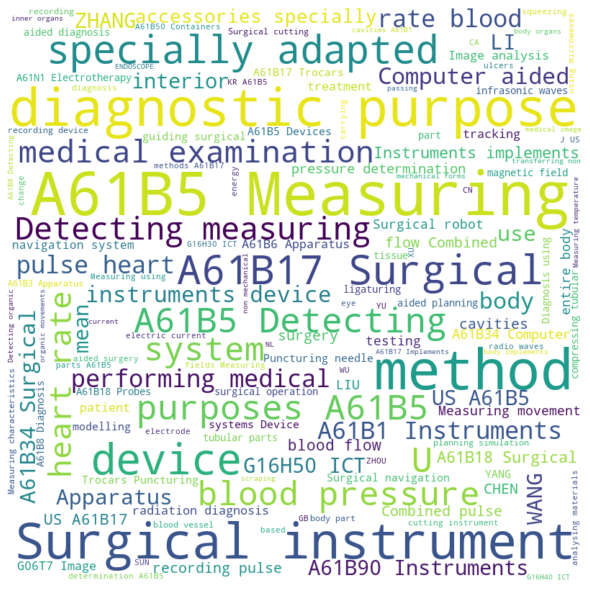

In [31]:
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df['ipc_main_class'] = df['IPC'].apply(lambda x: x[:4])
# Combine all the text data
text_data = df['Title'].str.cat(df['Inventors'], sep=' ').str.cat(df['IPC'], sep=' ')

# Generate the word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(' '.join(text_data))

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()


## Qualitative analysis
### Word Cloud Map: 
#### 2-Word Cloud of Countries (excluding China)

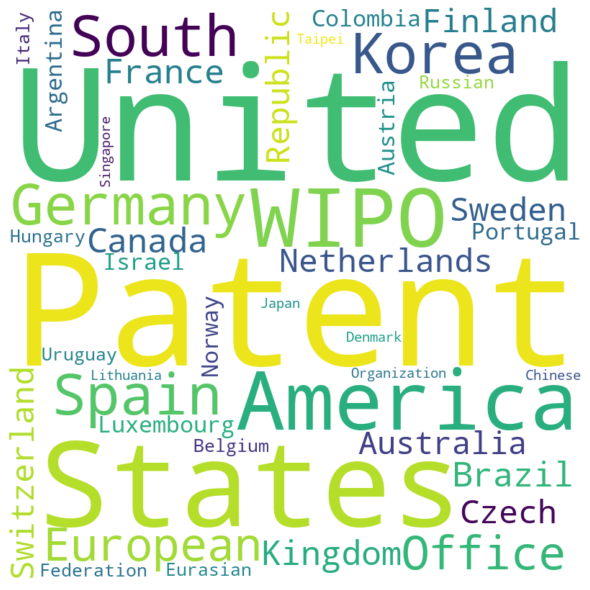

In [32]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Create a string of all the countries in the dataframe, separated by spaces, excluding "China"
countries_string = ' '.join(country for country in df['country'].unique() if country != 'China')

# Create a wordcloud object with desired parameters
wordcloud = WordCloud(width=800, height=800, background_color='white', min_font_size=10).generate(countries_string)

# Display the word cloud
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()
